In [175]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [3]:
import sys
from src.cleaning_functions import *

In [7]:
sharks = pd.read_csv("shark_attacks.csv",encoding = "ISO-8859-1")

Hipótesis:el número del muertes por tiburon ha descendido a lo largo del tiempo

In [56]:
sharks.sample(5)

,year,months_code,day,hour,country,sex,age,activity,species,type,injury,fatal_(y/n)
2014,2000.0,9.0,NaN,NaN,Tanzania,NaN,NaN,swimming,zambesi shark,Provoked,fatal,YES
461,2015.0,1.0,3.0,8.0,South Africa,M,15.0,surf,raggedtooth shark,Provoked,injury,NO
139,2017.0,5.0,30.0,NaN,United States of America,F,20.0,NaN,NaN,Provoked,injury,NO
1113,2009.0,7.0,5.0,16.0,United States of America,F,12.0,surf,NaN,Provoked,injury,NO
831,2011.0,12.0,23.0,12.0,United States of America,M,27.0,surf,NaN,Provoked,injury,NO


In [114]:
muertes_por_año = plt.figure(figsize=(15,4)) 
muertes_por_año=sns.countplot(data=sharks, x=sharks[(sharks.year>1800)
                                       &(sharks.country=="United States of America")].year, hue="sex");

muertes_por_año.set_xlabel( "Años" , size = 15 ) 
muertes_por_año.set_ylabel( "Accidentes" , size = 15 ) 
muertes_por_año.set_title("Datos de accidentes por año en EEUU",size = 24);

AttributeError: 'AxesSubplot' object has no attribute 'autofmt_xdate'

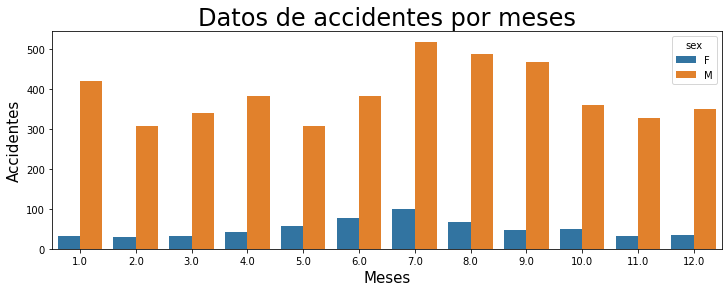

In [95]:
muertes_por_mes = plt.figure(figsize=(12,4)) 
muertes_por_mes=sns.countplot(data=sharks, x="months_code", hue="sex");

muertes_por_mes.set_xlabel( "Meses" , size = 15 ) 
muertes_por_mes.set_ylabel( "Accidentes" , size = 15 ) 
muertes_por_mes.set_title("Datos de accidentes por meses",size = 24);

Datos de muertes por actividad

In [133]:
muertes_por_año = px.histogram(sharks, x=sharks[(sharks["year"]>1800)&(sharks["fatal_(y/n)"]=="YES")].year)

fig.update_layout(
    title="Datos de muertes por año",
    xaxis_title="Años",
    yaxis_title="Accidentes",
    legend_title="Legend Title",
    #font=dict(
        #family="Courier New, monospace",
        #size=18,
        #color="Black"
    #)
)
fig.show()

In [178]:
#muertes_por_año = px.histogram(sharks, x=sharks[(sharks["year"]>1800)].year, color=sharks[(sharks["year"]>1800)]["fatal_(y/n)"])
muertes_por_año = px.histogram(sharks, x=sharks[(sharks["year"]>1800)&(sharks["fatal_(y/n)"].notna())].year,
                               color=sharks[(sharks["year"]>1800)&(sharks["fatal_(y/n)"].notna())]["fatal_(y/n)"])


# muertes_por_año.update_layout(
#     title="Datos de accidentes por año",
#     xaxis_title="Años",
#     yaxis_title="Accidentes",
#     legend_title="Accidente mortal",
#     font=dict(
#         family="Courier New, monospace",
#         size=18,
#         color="Black"
#     )
# )
muertes_por_año.update_layout = {
#     title="Datos de accidentes por año",
#     xaxis_title="Años",
#     yaxis_title="Accidentes",
#     legend_title="Accidente mortal",
    "title": {"text": "Contribución en pesos de las variables"}, 
    "xaxis": {
        "range": [-1, 6], 
        "autorange": True
      }, 
    "yaxis": {
        "range": [-1, 4], 
        "autorange": True
    }, 
    "legend": {
        "x": 1, 
        "y": 1, 
        "font": {
            "size": 14, 
            "family": "Roboto"
        }, 
        "title": {
            "font": {
                "size": 16, 
                "color": "rgb(67, 36, 167)", 
                "family": "Overpass"
            }, 
            "text": "Variables"
        }, 
        "xanchor": "auto", 
        "itemsizing": "trace", 
        "traceorder": "normal", 
        "borderwidth": 0, 
        "orientation": "v"
    }
}
muertes_por_año = go.Figure(muertes_por_año,layout)

muertes_por_año.show()

In [ ]:
#import pandas as pd
# from random import uniform as uni
# import plotly.graph_objects as go
# import plotly.express as px
# from plotly.graph_objs import Data as Data

# df = pd.DataFrame({"etiquetas":["a","b","c","d","e","f"],
#                    "pesos":[uni(0.4,1) for i in range(6)]})

# def rose_chart1(df):
#     traces = []
#     df_ = df.pivot(columns = "etiquetas",values="pesos")
#     for ind,meta in df_.iterrows():
#         trace = {
#               "name": meta.index[ind], 
#               "r": meta.values, 
#               "type": "barpolar", 
#               "opacity": 1, 
#               "theta": df_.columns.values, 
#               "hoverinfo": "r+theta",
#               "opacity" : 0.68
#               }
#         traces.append(trace)
#     layout = {
#       "font": {
#         "size": 16, 
#         "family": "Overpass"
#       }, 
#       "polar": {
#         "hole": 0.0, 
#         "bargap": 0.05,  ## % del total que no se toma en cada area
#         "radialaxis": {
#           "visible":True,
#           "type": "linear", 
#           "title": {"text": "<br>"}, 
#           "tickmode": "auto", 
#           "tickfont": {"size": 14}, 
#           "autorange": True, 
#           "gridwidth": 2,  # ancho de las lineas radiales
#           "linewidth": 0
#         }, 
#         "angularaxis": {
#           "type": "category", 
#           "ticklen": 12, 
#           "tickmode":"auto",
#           "tickfont": {"color": "rgb(22, 22, 22)"}, 
#           "direction": "counterclockwise", 
#           "gridwidth": 2, 
#           "tickwidth": 1, 
#           "tickprefix": ""
#         }
#       }, 
#       "title": {"text": "Contribución en pesos de las variables"}, 
#       "xaxis": {
#         "range": [-1, 6], 
#         "autorange": True
#       }, 
#       "yaxis": {
#         "range": [-1, 4], 
#         "autorange": True
#       }, 
#       "legend": {
#         "x": 1, 
#         "y": 1, 
#         "font": {
#           "size": 14, 
#           "family": "Roboto"
#         }, 
#         "title": {
#           "font": {
#             "size": 16, 
#             "color": "rgb(67, 36, 167)", 
#             "family": "Overpass"
#           }, 
#           "text": "Variables"
#         }, 
#         "xanchor": "auto", 
#         "itemsizing": "trace", 
#         "traceorder": "normal", 
#         "borderwidth": 0, 
#         "orientation": "v"
#       }, 
#       "modebar": {
#         "color": "rgba(68, 68, 68, 0.3)", 
#         "bgcolor": "rgba(118, 6, 6, 0.5)", 
#         "orientation": "h"
#       }, 
#       "autosize": True, 
#       "template": {
#         "data": {
#           "bar": [
#             {
#               "type": "bar", 
#               "marker": {"colorbar": {
#                   "len": 0.2, 
#                   "ticks": "inside", 
#                   "ticklen": 6, 
#                   "tickcolor": "rgb(237,237,237)", 
#                   "outlinewidth": 0
#                 }}
#             }
#           ], 
#           "carpet": [
#             {
#               "type": "carpet", 
#               "aaxis": {
#                 "gridcolor": "white", 
#                 "linecolor": "white", 
#                 "endlinecolor": "rgb(51,51,51)", 
#                 "minorgridcolor": "white", 
#                 "startlinecolor": "rgb(51,51,51)"
#               }, 
#               "baxis": {
#                 "gridcolor": "white", 
#                 "linecolor": "white", 
#                 "endlinecolor": "rgb(51,51,51)", 
#                 "minorgridcolor": "white", 
#                 "startlinecolor": "rgb(51,51,51)"
#               }
#             }
#           ], 
#         }, 
#         "layout": {
#           "geo": {
#             "bgcolor": "white", 
#             "showland": True, 
#             "lakecolor": "white", 
#             "landcolor": "rgb(237,237,237)", 
#             "showlakes": True, 
#             "subunitcolor": "white"
#           }, 
#           "font": {"color": "rgb(51,51,51)","family": "Overpass"}, 
#           "polar": {
#             "bgcolor": "rgb(237,237,237)", 
#             "radialaxis": {
#               "ticks": "outside", 
#               "showgrid": True, 
#               "gridcolor": "white", 
#               "linecolor": "white", 
#               "tickcolor": "rgb(51,51,51)"
#             },
#           },   
#           "hovermode": "closest", 
#           "plot_bgcolor": "rgb(237,237,237)", 
#           "paper_bgcolor": "white", 
#           "shapedefaults": {
#             "line": {"width": 0}, 
#             "opacity": 0.3, 
#             "fillcolor": "black"}, 
#           "annotationdefaults": {
#             "arrowhead": 0, 
#             "arrowwidth": 1}
#         }
#       }, 
#       "radialaxis": {"ticksuffix": "%"}, 
#       "separators": ", ", 
#       "orientation": 0
#     }    

#     data = Data(traces)
#     fig = go.Figure(data,layout)
#     fig.show()